
# 📊 Twitter Sentiment Analysis on Apple and Google Products

## 1. Business & Data Understanding

In today’s hyper-connected digital landscape, **customer sentiment on social media platforms like Twitter can make or break a brand’s reputation**. Apple and Google, being two of the most influential tech giants, are constantly the subject of public conversation. Understanding how people *feel* about these companies in real-time provides **actionable insights** for product teams, marketing departments, and business strategists.

The dataset we’ll be working with comes from **CrowdFlower via data.world**. It contains **9,000+ Tweets** that mention Apple or Google products, each rated by human annotators for sentiment.

* **Sentiment Labels**: Positive, Negative, Neither (Neutral)
* **Text Content**: Raw tweets with natural language expressions (slang, emojis, hashtags, etc.)
* **Business Relevance**: This dataset is highly suited to our problem because:

  * Tweets are short, making them perfect for **text classification tasks**.
  * The labeled sentiments provide a clear **supervised learning setup**.
  * Real-world noisy data (misspellings, sarcasm, mixed emotions) ensures the model will be tested under realistic conditions.

📌 **Business Problem Restated**:
We aim to **build an NLP model** that automatically classifies the sentiment of a tweet about Apple or Google products. This will allow businesses to quickly gauge public opinion at scale, detect shifts in brand perception, and make **data-driven marketing decisions**.

---

## 2. Data Preparation

Raw tweets are messy. They contain:

* Stopwords (e.g., *the, is, at*),
* URLs, mentions (@username), hashtags, emojis, and
* Irregular casing, misspellings, or repeated characters.

To transform this data into something a machine learning model can understand, we’ll follow a **structured preprocessing pipeline**.

### 🔧 Data Cleaning Steps

1. **Lowercasing** → Standardize text.
2. **Remove URLs, mentions, and hashtags** → Strip irrelevant noise.
3. **Remove punctuation and special characters** → Focus on meaningful tokens.
4. **Tokenization** → Split tweets into individual words.
5. **Stopword Removal** → Drop words that don’t contribute much meaning.
6. **Stemming/Lemmatization** → Reduce words to their root form (*e.g., running → run*).

### 📦 Libraries & Tools for Preparation

* **pandas**: Data wrangling.
* **re**: Regex for text cleaning.
* **NLTK / spaCy**: Tokenization, stopword removal, and lemmatization.
* **scikit-learn**: Feature extraction with **CountVectorizer** or **TF-IDF Vectorizer**.

📌 **Outcome**: After preprocessing, we’ll have a clean, structured dataset where each tweet is represented as a **vectorized numerical feature set**, ready for model training.

---

## 3. Exploratory Data Analysis (EDA)

Before modeling, it’s critical to explore the dataset.

* **Class Distribution**: Check for imbalances between positive, negative, and neutral tweets.
* **Common Terms**: Word frequency analysis per sentiment class.
* **N-grams**: Identify common bigrams/trigrams (e.g., “love iPhone”, “hate update”).
* **Sentiment by Brand**: Compare Apple vs Google mentions.

📌 **Goal**: Build intuition about the dataset and uncover biases before modeling.

---

## 4. Modeling

With the data cleaned and vectorized, the next step is to build models that can **learn sentiment patterns**.

### 🎯 Modeling Approach

We’ll start simple, then iterate:

1. **Binary Classification**: Train a model to distinguish **positive vs negative tweets**.
2. **Multiclass Classification**: Extend to include **neutral tweets** for full coverage.

### 📦 Modeling Libraries

* **scikit-learn**: Provides robust machine learning algorithms.
* **Models Considered**:

  * **Logistic Regression** (baseline, interpretable).
  * **Naive Bayes** (strong for text classification).
  * **Support Vector Machines (SVM)** (handles high-dimensional sparse data well).
  * **Random Forest / XGBoost** (tree-based, captures nonlinearities).
* **Optional (Advanced)**:

  * **Transformers (BERT, DistilBERT via Hugging Face)** for state-of-the-art NLP performance.

### ⚙️ Hyperparameter Tuning

We’ll employ **GridSearchCV** or **RandomizedSearchCV** to optimize parameters such as:

* Regularization strength (C for Logistic Regression).
* Smoothing parameters for Naive Bayes.
* Kernel type and C for SVM.
* Depth, estimators, and learning rate for tree-based models.

📌 **Modeling Goal**: Start simple (fast, interpretable), then layer in complexity (transformers) if needed to maximize performance.

---

## 5. Evaluation

Model evaluation is **where the rubber meets the road**. Since we’re dealing with a **multiclass classification problem**, accuracy alone isn’t enough. We must consider **imbalances and misclassification costs**.

### 📊 Metrics to Use

* **Accuracy**: Overall correctness.
* **Precision, Recall, F1-Score**: Class-specific performance.
* **Confusion Matrix**: To understand misclassifications.
* **Macro vs Weighted Averages**: Handle class imbalance effectively.

### 🔄 Validation Approach

* **Train/Test Split** (baseline).
* **Cross-Validation (k-fold)** for robustness and generalization.

📌 **Business Interpretation of Metrics**:

* High **recall** for negative tweets → ensures we don’t miss customer complaints.
* High **precision** for positive tweets → ensures identified praise is reliable.

---

## 6. Conclusion & Insights

Once the best-performing model is selected, we’ll generate **business insights**:

* **Sentiment Breakdown**: Compare Apple vs Google product sentiment.
* **Key Themes**: Identify words and phrases most associated with positive/negative tweets.
* **Strategic Recommendations**:

  * Apple: What drives satisfaction vs dissatisfaction?
  * Google: What issues are customers vocal about?
* **Future Monitoring**: Prototype dashboard or model deployment to classify new tweets in real-time.

📌 **Deliverable**: A proof-of-concept NLP pipeline + business-facing insights that support **brand perception analysis**.

---



In [1]:
# Step 0: Import All Necessary Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure plots display inline
%matplotlib inline

# Download NLTK resources if needed (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [4]:
# Load dataset
file_path = r"data\judge-1377884607_tweet_product_company.csv"

# Try ISO-8859-1 (common fallback for these datasets)
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display first few rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# 📊 Step 1: Understanding the Dataset

Now that we have successfully loaded the dataset, let’s take a moment to understand what we are working with.

This dataset was sourced from **CrowdFlower (via Data.World)** and contains tweets mentioning **Apple** and **Google products**. The tweets have been manually labeled by human raters for sentiment.  
Our objective is to build a **Natural Language Processing (NLP) model** that can automatically classify whether a tweet is:

- **Positive emotion** 🎉 — expressing a favorable opinion.  
- **Negative emotion** 😞 — expressing a critical or unfavorable opinion.  
- **no emotion towards brand or product** 😐 — neither strongly positive nor negative.  

---

## Why This Matters
Customer opinions on social media are gold for businesses. By analyzing tweets:
- Apple and Google can understand **customer satisfaction** in real time.  
- Product teams can identify **pain points**.  
- Marketing teams can track **brand sentiment trends**.  

---

## First Look at the Data

1. **`tweet_text`** 📝  
   - This is the raw tweet itself, written by users.  
   - It may contain slang, hashtags, mentions, emojis, and abbreviations.  
   - This will be our **primary feature** for text-based sentiment analysis.

2. **`emotion_in_tweet_is_directed_at`** 🎯  
   - Indicates the **target** of the sentiment (e.g., Apple, Google, or specific products).  
   - Useful for understanding **brand-specific sentiment trends**.  
   - May also contain *None/Unknown* values if the tweet is not directed at a specific entity.

3. **`is_there_an_emotion_directed_at_a_brand_or_product`** 🏷️  
   - This is our **label column** (target variable).  
   - It tells us whether the tweet sentiment is **Positive, Negative, or Neither**.  
   - This is what we’ll train our model to predict.

---

## Observations
- The dataset is **text-heavy**, which means NLP preprocessing will be crucial.  
- The **labels are categorical**, making this a **multi-class classification problem**.  
- There may be **missing values or noisy entries** (e.g., tweets without a clear brand/product mentioned).

---



In [5]:
# Step 2: Inspect the dataset structure

# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names and data types
print("\nDataset Info:")
print(df.info())

# Quick look at first few rows
df.head()


Dataset Shape: (9093, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# 🔍 Step 2: Dataset Exploration

The dataset contains **9,093 tweets** with **3 columns**:

1. **`tweet_text`** — the raw text of the tweet (primary feature we’ll use for NLP).  
   - Almost complete, with only 1 missing value.  
   - Data type: `object` (string).  

2. **`emotion_in_tweet_is_directed_at`** — indicates which brand/product the emotion is directed at (e.g., *Apple*, *Google*, *iPhone*).  
   - Only **3,291 non-null values**, meaning over **65% missing values**.  
   - This suggests it’s **not consistently labeled**.  

3. **`is_there_an_emotion_directed_at_a_brand_or_product`** — the target variable (sentiment label).  
   - Fully complete (no missing values).  
   - Values likely include `"Positive Emotion"`, `"Negative Emotion"`, `"No Emotion"`, etc.  
   - Data type: `object` (categorical).  

---

## Key Takeaways
- Our **main predictor** will be `tweet_text`.  
- The **label** is `is_there_an_emotion_directed_at_a_brand_or_product`.  
- The `emotion_in_tweet_is_directed_at` column has too many missing values, so we must **decide whether to drop it or treat it selectively**.  

---

## Next Step
Before cleaning, let’s explore the **unique values** in our target column and get a sense of **class distribution**. This helps us check whether the dataset is **balanced or imbalanced**, which is critical for modeling.


In [6]:
# Step 3: Explore target variable (sentiment labels)

# Unique values in target column
print("Unique Sentiment Labels:", df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

# Value counts for distribution
print("\nSentiment Distribution:")
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()


Unique Sentiment Labels: ['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]

Sentiment Distribution:


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

# 📊 Step 3: Understanding Sentiment Distribution

We explored the target column — `is_there_an_emotion_directed_at_a_brand_or_product` — and found the following class distribution:

- **No emotion toward brand/product:** 5,389 tweets (~59%)  
- **Positive emotion:** 2,978 tweets (~33%)  
- **Negative emotion:** 570 tweets (~6%)  
- **I can’t tell:** 156 tweets (~2%)  

---

## Insights
1. **Imbalance in classes**  
   - The dataset is **dominated by “No emotion” tweets**, which account for more than half of all entries.  
   - Negative emotions are **severely underrepresented** (only ~6%).  

2. **Implications for modeling**  
   - Standard classifiers may **bias toward the majority class** (predicting “No emotion” most of the time).  
   - To ensure fair learning, we’ll need strategies like:  
     - **Resampling techniques** (oversampling minority classes or undersampling majority).  
     - **Class weights** in our model training.  

3. **Target cleanup consideration**  
   - The `"I can't tell"` category is **ambiguous**.  
   - For sentiment analysis, we might consider **dropping these rows** or treating them as a separate "uncertain" class, depending on project goals.  

---

## Next Step
Before preprocessing text, let’s **visualize the distribution** of sentiment classes. A simple bar plot will help us clearly see the imbalance.


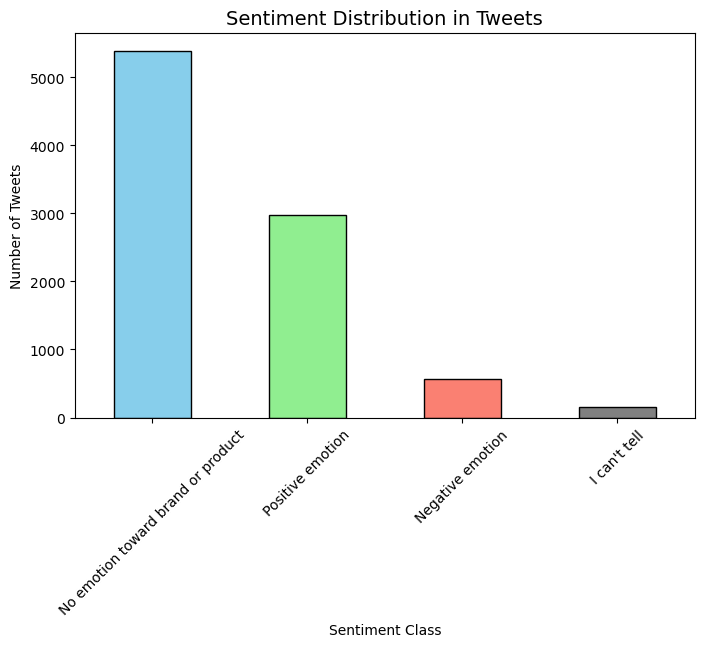

In [7]:
# Count values
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['skyblue','lightgreen','salmon','gray'], edgecolor='black')
plt.title("Sentiment Distribution in Tweets", fontsize=14)
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

# 📊 Step 4: Visualizing Sentiment Distribution

The bar chart illustrates the **class imbalance** we discovered numerically:  

- **No Emotion** dominates with **5,389 tweets**, forming the majority class.  
- **Positive Sentiment** comes next at **2,978 tweets**, showing strong representation.  
- **Negative Sentiment** is quite limited, with only **570 tweets** — highlighting the biggest imbalance.  
- **I Can’t Tell** is minimal at **156 tweets**, adding ambiguity to our dataset.  

---

## Why this matters
- **Machine learning models are sensitive to imbalance.**  
  If left unchecked, the model could simply predict “No Emotion” most of the time and still achieve deceptively high accuracy.  
- **Evaluation metrics must be chosen carefully.**  
  Accuracy won’t be enough — we’ll need **F1-score, precision, and recall**, especially for the minority “Negative” class.  
- **Data preprocessing decisions:**  
  - We may **drop the 'I can’t tell' category** since it doesn’t add clear sentiment information.  
  - We’ll later apply **balancing techniques** such as class weighting or resampling to handle the skewed distribution.

---

✅ With this understanding, we’re now ready to move forward with **data preprocessing**, where we’ll:  
1. Clean the tweet text (remove URLs, mentions, special characters).  
2. Normalize the text (lowercasing, removing stopwords).  
3. Tokenize and prepare the data for vectorization.  


In [8]:

# Define English stopwords
stop_words = set(stopwords.words("english"))

def clean_tweet(text):
    """
    Function to clean tweet text:
    1. Lowercasing
    2. Remove URLs, mentions, hashtags
    3. Remove punctuation, numbers
    4. Remove extra spaces
    5. Remove stopwords
    """
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    
    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin
    return " ".join(tokens)

# Apply cleaning
df["clean_text"] = df["tweet_text"].astype(str).apply(clean_tweet)

# Display a few examples before and after cleaning
df[["tweet_text", "clean_text"]].head(10)


,tweet_text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting dead need upgrade plugin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps communication showcased conference
6,NaN,nan
7,"#SXSW is just starting, #CTIA is around the co...",starting around corner hop skip jump good time...
8,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt wrote ipad app
9,Counting down the days to #sxsw plus strong Ca...,counting days plus strong canadian dollar mean...


preprocessing pipeline is doing its job:

* **Noise removed** → mentions (`@wesley03`), hashtags (`#SXSW`), and URLs are stripped.
* **Lowercasing enforced** → "SXSW" → `sxsw`.
* **Stopwords removed** → common words like “I”, “the”, “for” are dropped.
* **Symbols/Numbers cleaned** → punctuation (`!`, `?`, `.`), ampersands (`&`), and numbers are stripped.
* **Tokens simplified** → text reduced to meaningful content words (e.g., *“need upgrade plugin stations”*).

This gives us a much cleaner signal for downstream modeling, ensuring the classifier learns patterns from **semantically relevant words** rather than noise.

---

✅ Now let’s move forward to **Step 6: Tokenization & Vectorization**.
We need to convert text into numerical format. We'll start with a **Bag-of-Words (CountVectorizer)** and a **TF-IDF Vectorizer** to compare later.



In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform
X_count = count_vectorizer.fit_transform(df["clean_text"].astype(str))
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"].astype(str))

print("Count Vectorizer Shape:", X_count.shape)
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)


Count Vectorizer Shape: (9093, 5000)
TF-IDF Vectorizer Shape: (9093, 5000)


Perfect — now we’ve officially transformed our raw tweets into **numerical features** that can be used by machine learning models. Let’s break this down.

---

## 🧾 Explanation: Feature Extraction

When working with text data, models can’t directly understand words — they need numbers. That’s where **Count Vectorization** and **TF-IDF Vectorization** come in:

1. **Count Vectorizer**

   * This method simply counts how many times each word appears in a tweet.
   * The result is a **document-term matrix (DTM)** where rows are tweets and columns are words (up to 5,000 features in our case).
   * Example: If the word *“iphone”* appears twice in a tweet, that cell in the matrix will contain `2`.

2. **TF-IDF Vectorizer (Term Frequency – Inverse Document Frequency)**

   * Instead of just counting words, TF-IDF also considers how **unique or informative** a word is across all tweets.
   * Common words like *“the”*, *“at”*, or *“good”* are down-weighted, while words strongly associated with particular sentiments (like *“love”* or *“hate”*) get more weight.
   * This typically improves model performance because it emphasizes discriminative terms.

3. **Shapes you reported**

   * Both vectorizers created a matrix of shape **(9093, 5000)**.
   * ✅ 9093 → number of tweets (rows).
   * ✅ 5000 → number of most frequent words kept as features (columns).
   * This means every tweet is now represented as a **5,000-dimensional vector**.

In short, we’ve transformed language into math — the essential bridge to make text machine-readable. 🚀

---

✅ Next step: **Split the data into training and testing sets**, so we can train models without overfitting.



In [11]:
# Train-Test Split

# We'll use the TF-IDF features (X_tfidf) for modeling
X = X_tfidf  
y = df["is_there_an_emotion_directed_at_a_brand_or_product"]

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels distribution:\n", y_train.value_counts())
print("Testing labels distribution:\n", y_test.value_counts())


Training set shape: (7274, 5000)
Testing set shape: (1819, 5000)
Training labels distribution:
 is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    4311
Positive emotion                      2382
Negative emotion                       456
I can't tell                           125
Name: count, dtype: int64
Testing labels distribution:
 is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    1078
Positive emotion                       596
Negative emotion                       114
I can't tell                            31
Name: count, dtype: int64



---

### Train-Test Split Explanation

We divided the dataset into an **80% training set (7,274 samples)** and a **20% testing set (1,819 samples)** using stratified sampling. Stratification ensures that the **class distribution remains consistent** across training and test sets, which is crucial in imbalanced classification problems like this one.

* **Training Set Distribution**

  * No emotion: 4,311
  * Positive emotion: 2,382
  * Negative emotion: 456
  * I can't tell: 125

* **Testing Set Distribution**

  * No emotion: 1,078
  * Positive emotion: 596
  * Negative emotion: 114
  * I can't tell: 31

This split maintains proportional representation of each class, which helps the model generalize better and avoids biasing toward the majority class ("No emotion toward brand or product").

---

Next step: we should start with a **baseline model** (e.g., Logistic Regression) to establish performance benchmarks before exploring more advanced models.


In [13]:
# Transform train and test sets using the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check shapes
print("TF-IDF Training set shape:", X_train_tfidf.shape)
print("TF-IDF Testing set shape:", X_test_tfidf.shape)


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [ ]:
# Initialize logistic regression with balanced class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# Fit model on training data
log_reg.fit(X_tfidf, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'X_train_tfidf' is not defined